## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
# your code here
data = pd.read_csv("german_credit.csv", sep=",")

In [ ]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [ ]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [ ]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isna().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

In [ ]:
data.purpose.unique()

array(['car (used)', 'others', 'retraining', 'furniture/equipment',
       'car (new)', 'business', 'domestic appliances', 'radio/television',
       'repairs', 'vacation'], dtype=object)

In [ ]:
data.personal_status_sex.unique()

array(['female : non-single or male : single', 'male : married/widowed',
       'female : single', 'male : divorced/separated'], dtype=object)

In [ ]:
data.property.unique()

array(['car or other', 'unknown / no property',
       'building soc. savings agr./life insurance', 'real estate'],
      dtype=object)

In [ ]:
data.job.unique()

array(['skilled employee/official', 'unskilled - resident',
       'unemployed/unskilled - non-resident',
       'manager/self-empl./highly qualif. employee'], dtype=object)

In [ ]:
data.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [ ]:
data.credit_risk.unique()

array(['good', 'bad'], dtype=object)

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data1 = data.groupby(by="purpose")

In [ ]:
data1["amount"].sum()

purpose
business                98512
car (new)              553133
car (used)             555124
domestic appliances     60018
furniture/equipment    696552
others                 716730
radio/television        17976
repairs                159020
retraining             403330
vacation                10853
Name: amount, dtype: int64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
len(data.loc[(data["age"]<30 ) & (data["housing"]=="rent")])/len(data.loc[data["age"]<30])

0.6666666666666666

In [ ]:
len(data.loc[(data["age"]>40 ) & (data["housing"]=="rent")])/len(data.loc[data["age"]>40])

0.6801470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
len(data.loc[(data["foreign_worker"]=="yes") & (data["number_credits"]>"3")])

1

### Задание 6 (1 балл)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

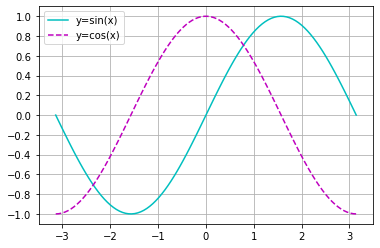

In [ ]:
import math
from math import pi
xnumbers = np.linspace(-3, 3, 7)
ynumbers = np.linspace(-1, 1, 11)
x = np.linspace(-pi, pi, 100)
y = np.sin(x)
z = np.cos(x)
plt.plot(x, y, "c", x, z, "--m")
plt.xticks(xnumbers)
plt.yticks(ynumbers)
plt.legend(['y=sin(x)', 'y=cos(x)'])
plt.grid()
plt.axis([-3.5, 3.5, -1.1, 1.1])
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [ ]:
# data.set_index('status', inplace=True)
# index0 = data.index
# index1 = data.index
# column0 = data["custom_credit_risk"].loc[data["credit_risk"]=="good"].sum()
# column1 = data["custom_credit_risk"].loc[data["credit_risk"]=="bad"].sum()
# title0 = 'Good Risk'
# title1 = 'Bad Risk'
# fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
# fig.tight_layout()
# axes[0].barh(index0, column0, align='center', zorder=10)
# axes[0].set_title(title0, fontsize=18, pad=15)
# axes[1].barh(index1, column1, align='center', zorder=10)
# axes[1].set_title(title1, fontsize=18, pad=15)

In [ ]:
data0['good']['no checking account'] = 0
data0['good']['... < 0 DM'] = 0
data0['good']['... >= 200 DM / salary for at least 1 year'] = 0
data0['good']['0<= ... < 200 DM'] = 0
data0['bad']['no checking account'] = 0
data0['bad']['... < 0 DM'] = 0
data0['bad']['... >= 200 DM / salary for at least 1 year'] = 0
data0['bad']['0<= ... < 200 DM'] = 0
df=data
for i in range(len(df)):
    if df['status'][i]=='no checking account' and df['credit_risk'][i]=='good':
        data0['good']['no checking account']+=1
    elif df['status'][i]=='... < 0 DM' and df['credit_risk'][i]=='good':
        data0['good']['... < 0 DM']+=1
    elif df['status'][i]=='... >= 200 DM / salary for at least 1 year' and df['credit_risk'][i]=='good':
        data0['good']['... >= 200 DM / salary for at least 1 year']+=1
    elif df['status'][i]=='0<= ... < 200 DM' and df['credit_risk'][i]=='good':
         data0['good']['0<= ... < 200 DM']+=1
    elif df['status'][i]=='no checking account' and df['credit_risk'][i]=='bad':
        data0['bad']['no checking account']+=1
    elif df['status'][i]=='... < 0 DM' and df['credit_risk'][i]=='bad':
        data0['bad']['... < 0 DM']+=1
    elif df['status'][i]=='... >= 200 DM / salary for at least 1 year' and df['credit_risk'][i]=='bad':
        data0['bad']['... >= 200 DM / salary for at least 1 year']+=1
    elif df['status'][i]=='0<= ... < 200 DM' and df['credit_risk'][i]=='bad':
        data0['bad']['0<= ... < 200 DM']+=1

In [ ]:
data0

,good,bad
status,,
no checking account,139,135
... < 0 DM,164,105
... >= 200 DM / salary for at least 1 year,348,46
0<= ... < 200 DM,49,14


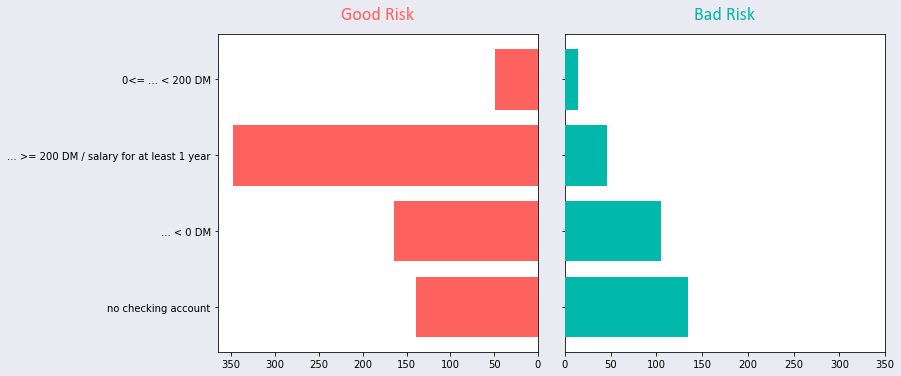

In [ ]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = data0.index
column0 = data0["good"]
column1 = data0["bad"]
#title='Status of checking account'
title0 = 'Good Risk'
title1 = 'Bad Risk'
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
axes[0].invert_xaxis()
axes[0].set(yticks=data0.index, yticklabels=data0.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black')
axes[0].set_xticks([0, 50, 100, 150, 200, 250, 300, 350])
axes[1].set_xticks([0, 50, 100, 150, 200, 250, 300, 350])

### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

In [ ]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,custom_credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,21,none,for free,1,skilled employee/official,0 to 2,no,no,good,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,23,none,for free,1,unskilled - resident,0 to 2,no,no,good,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good,1


In [ ]:
data=data.reset_index()

In [ ]:
data

,index,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,custom_credit_risk
0,0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,...,21,none,for free,1,skilled employee/official,0 to 2,no,no,good,1
1,1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,...,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good,1
2,2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,...,23,none,for free,1,unskilled - resident,0 to 2,no,no,good,1
3,3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,...,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good,1
4,4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,...,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,...,21,none,for free,1,unskilled - resident,3 or more,no,no,bad,1
996,996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,...,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad,1
997,997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,...,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad,1
998,998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,...,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad,1


Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

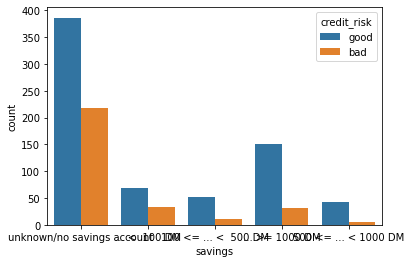

In [ ]:
sns.countplot(x="savings", hue="credit_risk", data=data);

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

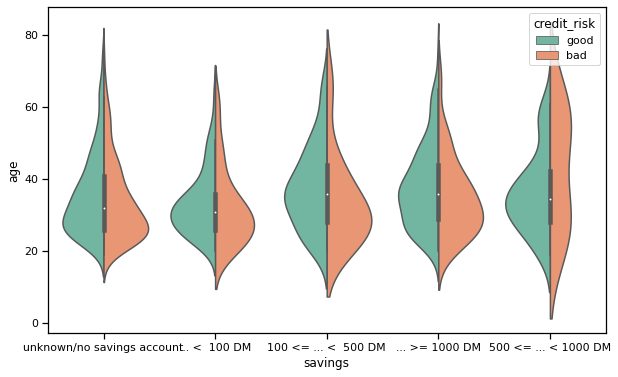

In [ ]:
with sns.plotting_context("notebook", font_scale=1):

    plt.figure(figsize=(10, 6))
    sns.violinplot(x="savings", y="age", hue="credit_risk",
                   data=data, palette="Set2", split=True);
    plt.ylabel('age');
    plt.xlabel('savings');

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

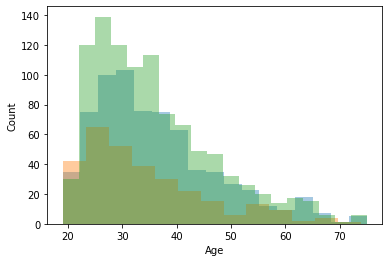

In [ ]:
sns.distplot(data['age'].loc[data["credit_risk"]=="good"],kde=False)
sns.distplot(data['age'].loc[data["credit_risk"]=="bad"],kde=False)
sns.distplot(data['age'],kde=False)
plt.ylabel('Count');
plt.xlabel('Age');

Text(0.5, 1.0, 'Overall credits age distribution')

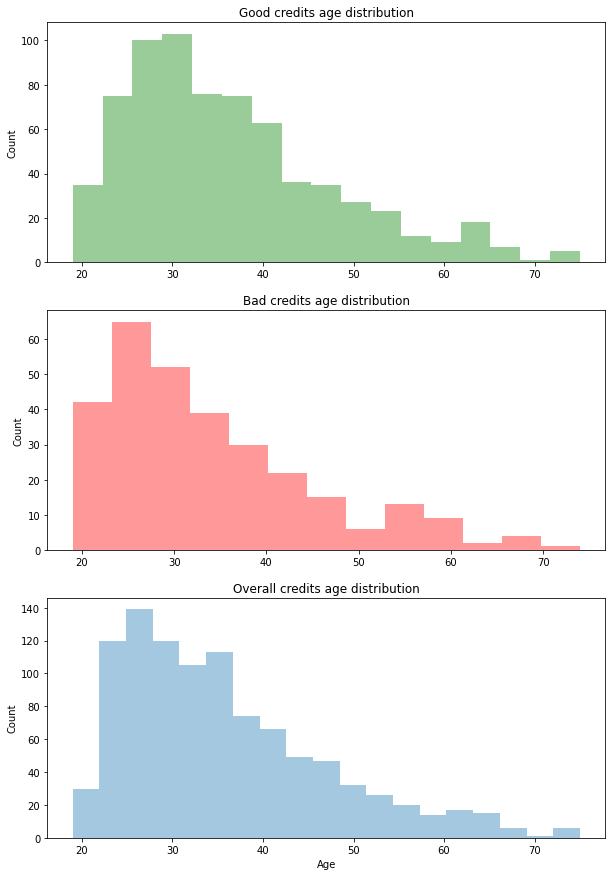

In [ ]:
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
sns.distplot(data['age'].loc[data["credit_risk"]=="good"], color="green", kde=False)
plt.ylabel('Count');
plt.xlabel("");
plt.title("Good credits age distribution")
plt.subplot(3, 1, 2)
sns.distplot(data['age'].loc[data["credit_risk"]=="bad"], color="red", kde=False)
plt.ylabel('Count');
plt.xlabel("");
plt.title("Bad credits age distribution")
plt.subplot(3, 1, 3)
sns.distplot(data['age'],kde=False)
plt.ylabel('Count');
plt.xlabel('Age');
plt.title("Overall credits age distribution")

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

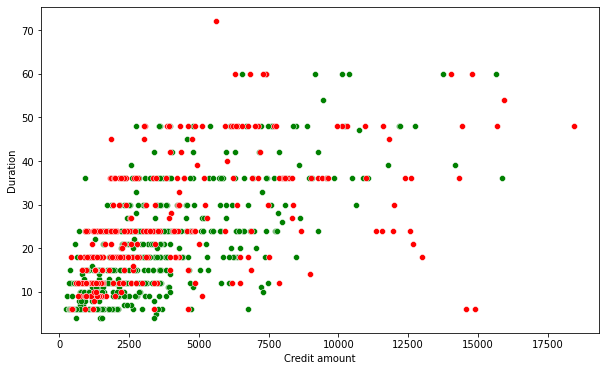

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data.loc[data["credit_risk"]=="good"], x="amount", y="duration", color="green")
sns.scatterplot(data=data.loc[data["credit_risk"]=="bad"], x="amount", y="duration", color="red")
plt.ylabel('Duration');
plt.xlabel('Credit amount');

<AxesSubplot:xlabel='amount', ylabel='duration'>

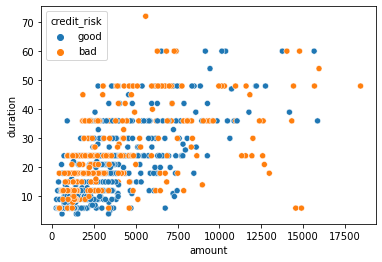

In [ ]:
sns.scatterplot(
    data=data,
    x="amount",
    y="duration",
    hue="credit_risk")

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

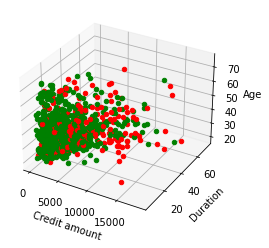

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
# x = data['amount']
# y = data['duration']
# z = data['age']
# ax.scatter(x, y, z)
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
for i in range(len(data)):
    if data['credit_risk'][i] == 'good':
        x = data['amount'][i]
        y = data['duration'][i]
        z = data['age'][i]
        ax.scatter(x, y, z, color="green")
    elif data['credit_risk'][i] == 'bad':
        x = data['amount'][i]
        y = data['duration'][i]
        z = data['age'][i]
        ax.scatter(x, y, z, color="red")
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
data.head()

,index,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [ ]:
Data = pd.get_dummies(data, columns=["foreign_worker"], drop_first=True)
Data = pd.get_dummies(Data, columns=["credit_risk"], drop_first=True)
Data = pd.get_dummies(Data, columns=["telephone"], drop_first=True)
Data = pd.get_dummies(Data, columns=["status"], drop_first=True)
Data = pd.get_dummies(Data, columns=["credit_history"], drop_first=True)
Data = pd.get_dummies(Data, columns=["purpose"], drop_first=True)
Data = pd.get_dummies(Data, columns=["savings"], drop_first=True)
Data = pd.get_dummies(Data, columns=["employment_duration"], drop_first=True)
Data = pd.get_dummies(Data, columns=["installment_rate"], drop_first=True)
Data = pd.get_dummies(Data, columns=["personal_status_sex"], drop_first=True)
Data = pd.get_dummies(Data, columns=["other_debtors"], drop_first=True)
Data = pd.get_dummies(Data, columns=["present_residence"], drop_first=True)
Data = pd.get_dummies(Data, columns=["property"], drop_first=True)
Data = pd.get_dummies(Data, columns=["other_installment_plans"], drop_first=True)
Data = pd.get_dummies(Data, columns=["housing"], drop_first=True)
Data = pd.get_dummies(Data, columns=["number_credits"], drop_first=True)
Data = pd.get_dummies(Data, columns=["job"], drop_first=True)
Data = pd.get_dummies(Data, columns=["people_liable"], drop_first=True)
Data = Data[Data.columns.drop("index")]
Data.head()

,duration,amount,age,foreign_worker_yes,credit_risk_good,telephone_yes (under customer name),status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_critical account/other credits elsewhere,...,other_installment_plans_stores,housing_own,housing_rent,number_credits_2-3,number_credits_4-5,number_credits_>= 6,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_3 or more
0,18,1049,21,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,9,2799,36,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,12,841,23,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,12,2122,39,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
4,12,2171,38,1,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
d1=data.loc[data["credit_risk"]=="bad"]

In [ ]:
d1.head(50)

,index,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
22,22,... < 0 DM,36,no credits taken/all credits paid back duly,domestic appliances,2384,unknown/no savings account,< 1 yr,< 20,male : married/widowed,...,real estate,33,none,for free,1,unskilled - resident,0 to 2,no,no,bad
45,45,no checking account,18,no credits taken/all credits paid back duly,others,1216,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,...,building soc. savings agr./life insurance,23,none,for free,1,skilled employee/official,0 to 2,yes (under customer name),no,bad
47,47,... >= 200 DM / salary for at least 1 year,18,all credits at this bank paid back duly,repairs,1864,... < 100 DM,1 <= ... < 4 yrs,< 20,female : non-single or male : single,...,unknown / no property,30,none,rent,2-3,skilled employee/official,0 to 2,no,no,bad
97,97,... < 0 DM,36,existing credits paid back duly till now,retraining,4455,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : divorced/separated,...,unknown / no property,30,stores,rent,2-3,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
110,110,no checking account,15,no credits taken/all credits paid back duly,others,3959,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,female : non-single or male : single,...,car or other,29,none,rent,1,skilled employee/official,0 to 2,yes (under customer name),no,bad
158,158,... < 0 DM,48,critical account/other credits elsewhere,retraining,6416,unknown/no savings account,>= 7 yrs,< 20,female : non-single or male : single,...,real estate,59,none,for free,1,skilled employee/official,0 to 2,no,no,bad
171,171,no checking account,12,no credits taken/all credits paid back duly,others,1228,unknown/no savings account,1 <= ... < 4 yrs,< 20,female : non-single or male : single,...,unknown / no property,24,none,rent,1,unskilled - resident,0 to 2,no,no,bad
234,234,... < 0 DM,12,no credits taken/all credits paid back duly,others,685,unknown/no savings account,4 <= ... < 7 yrs,25 <= ... < 35,female : single,...,building soc. savings agr./life insurance,25,bank,rent,1,unskilled - resident,0 to 2,no,no,bad
304,304,0<= ... < 200 DM,9,no credits taken/all credits paid back duly,furniture/equipment,745,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,female : non-single or male : single,...,unknown / no property,28,none,rent,1,unskilled - resident,0 to 2,no,no,bad
353,353,no checking account,12,all credits at this bank paid back duly,others,3499,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,female : non-single or male : single,...,unknown / no property,29,none,rent,2-3,skilled employee/official,0 to 2,no,no,bad


In [ ]:
Data.head(50)

,duration,amount,age,foreign_worker_yes,credit_risk_good,telephone_yes (under customer name),status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_critical account/other credits elsewhere,...,other_installment_plans_stores,housing_own,housing_rent,number_credits_2-3,number_credits_4-5,number_credits_>= 6,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_3 or more
0,18,1049,21,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,9,2799,36,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,12,841,23,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,12,2122,39,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
4,12,2171,38,1,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
5,10,2241,48,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
6,8,3398,39,1,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
7,6,1361,40,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
8,18,1098,65,0,1,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
9,24,3758,23,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
def predict(Xtest: np.array) -> np.array:
    if 20<="age"<=40 and "people_liable"=="0 to 2" and
    "personal_status_sex"=="male : married/widowed" and "job"=="unskilled - resident":
        return 0
    elif "age"<=40 and "people_liable"=="0 to 2" and
    "personal_status_sex"=="female : non-single or male : single" and ("job"=="skilled employee/official" or "job"=="manager/self-empl./highly qualif. employee"):
        return 0
    return 1

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))